<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Programming123najra.gif" alt="Typing gif from Wikipedia" width="500px" />
</p>

# Spy Keypad

Part 2 for working with audio signals

---

## Overview
A door is encoded with a number pad (0-9). We can't see the door, but through nefariouis means we have a recording of someone opening it. Quick, we need to decode this [mystery signal](data/mystery_signal.wav)! The door code is encoded in this mystery_signal.wav file but we need to know what music notes and their order to open it

We know that the door code is set up as:
- A note: 0
- B note: 1
- C note: 2
- D note: 3
- E note: 4
- F note: 5

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Plotting on a data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)| Necessary | Familiarity with working with arrays |
| [Intro to SciPy](https://docs.scipy.org/doc/scipy-1.13.1/tutorial/fft.html) | Helpful | Familiarity with working with .wav files |

- **Time to learn**: 45 minutes

---

## Imports

In [1]:
import numpy as np                          # working with arrays
import pandas as pd                         # working with dataframes
from scipy.io import wavfile                # loading in wav files
import matplotlib.pyplot as plt             # plot data
from scipy.fftpack import fft, fftfreq      # working with Fourier Transforms

import pywt                                 # PyWavelets

## Extract audio .wav file
Like when working with the "Jingle Bells" song file, any .wav input file contains infomration about the amplitude at every point in the file. The frequency of the note will determine which chord each part of the piece represents

In [3]:
sampleRate, signalData = wavfile.read('../data/mystery_signal.wav')

duration = len(signalData) / sampleRate
time = np.arange(0, duration, 1/sampleRate) 

print(f"Sample Rate: {sampleRate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(signalData)} / {sampleRate}")
print(f"len of audio file = {len(signalData)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 6.0 seconds (sample rate and audioBuffer = 60000 / 10000
len of audio file = 60000
Total Length in time = 60000


## Let's Give the Data a Look!

It is always good practice to view the data that we have collected. First, let's organize the data into a `pandas` dataframe to organize the amplitude and time stamps

In [4]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signalData})
signal_df.head()

,time (seconds),amplitude
0,0.0000,11182
1,0.0001,29148
2,0.0002,2847
3,0.0003,14564
4,0.0004,21618


### Plot a Small Sample of the .wav File

Plot a small subsample of the .wav to visualize the input data

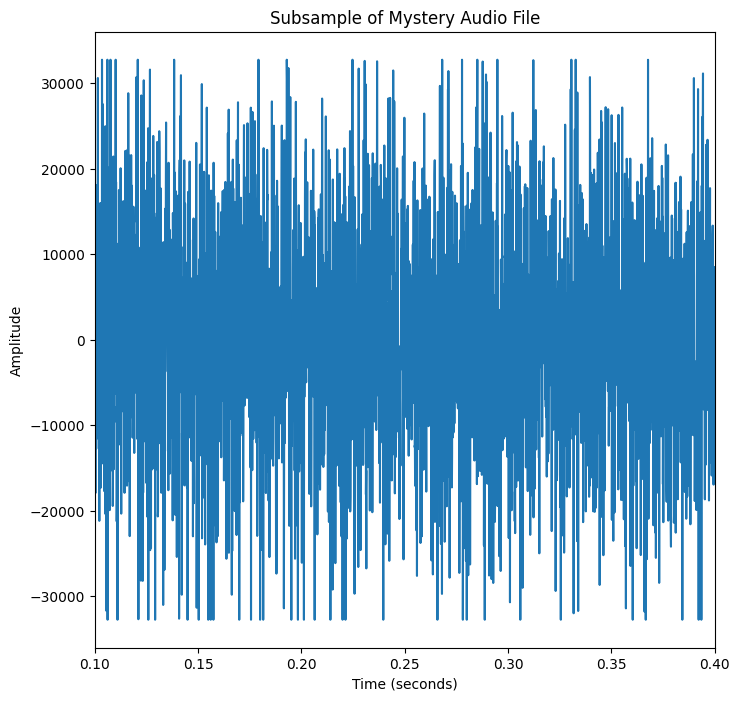

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title("Subsample of Mystery Audio File")
ax.set_xlim(signal_df["time (seconds)"][1000], signal_df["time (seconds)"][4000])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Waavelet Analysis: Power Spectrum

The power spectrum plots the real component of the complex number returns from `wavelet_coeff`. This will return information about the frequency and time that we need to determine which notes are used in what order for the keypad

In [6]:
wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

size (39, 60000) with 39 scales and 60000 time steps
x-axis be default is: 60000
y-axis be default is: 39


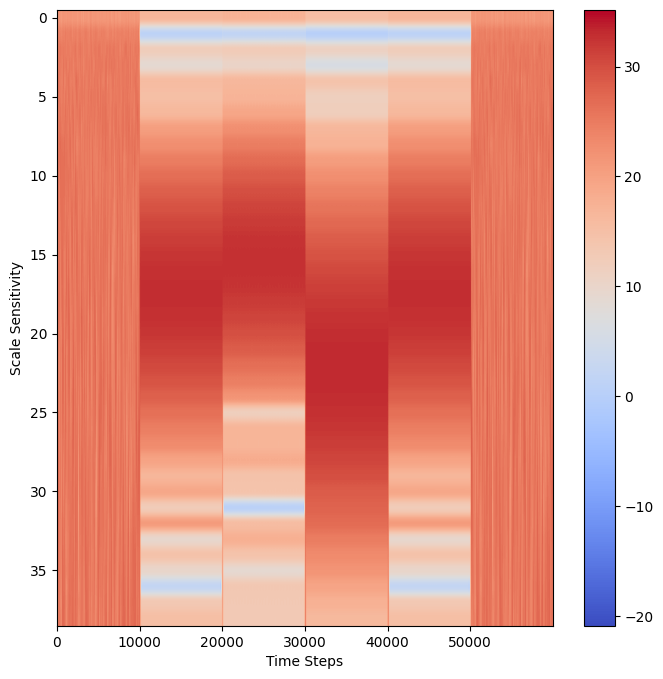

In [7]:
# Plot scalogram
fig, ax = plt.subplots(figsize=(8, 8))
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

## Behold! Distinct Bands of Frequencies!
Each distinct band represents a note. So, we can see that the data at the beginning at the end is random noise, with no distinct frequency. But at 1 second, a distinct note that lasts for 1 second, followed by three additional distinct bands. Let's see where the possible note frequencies we have might lie on scales

To overlay these frequencies with the wavelet scaologram:
<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
   To convert HZ frequency to a <code>scale = hz *.0001</code> (where 0.01 is 100 Hz sampling) then apply <code>frequency2scale</code>
</div>

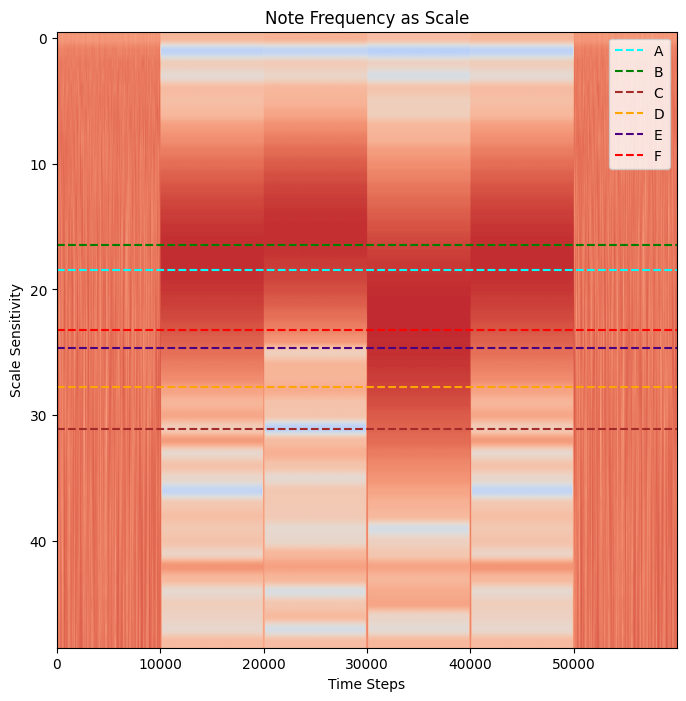

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay frequency of notes as dotted lines
sample_rate = 1/sampleRate
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
plt.axhline(y=a_freq, color='cyan', linestyle='--', label='A')
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
plt.axhline(y=b_freq, color="green", linestyle='--', label='B')
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
plt.axhline(y=c_freq, color='brown', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
plt.axhline(y=d_freq, color='orange', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
plt.axhline(y=e_freq, color='indigo', linestyle='--', label='E')
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
plt.axhline(y=f_freq, color='red', linestyle='--', label='F')

# Plot Power scalogram
power = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.show()

## But Which Match Best?

We are looking for a note frequency that best lines up with the darkest part of each band. The first and the last band seem like the same note, but is it closer to an A note or a B note?

Let's see if we can use Fourier Transform to get a smaller range of notes to chose from

## Fast Fourier Transform

In [30]:
fourier_transform = abs(fft(signalData))
freqs = fftfreq(len(fourier_transform), sample_rate)

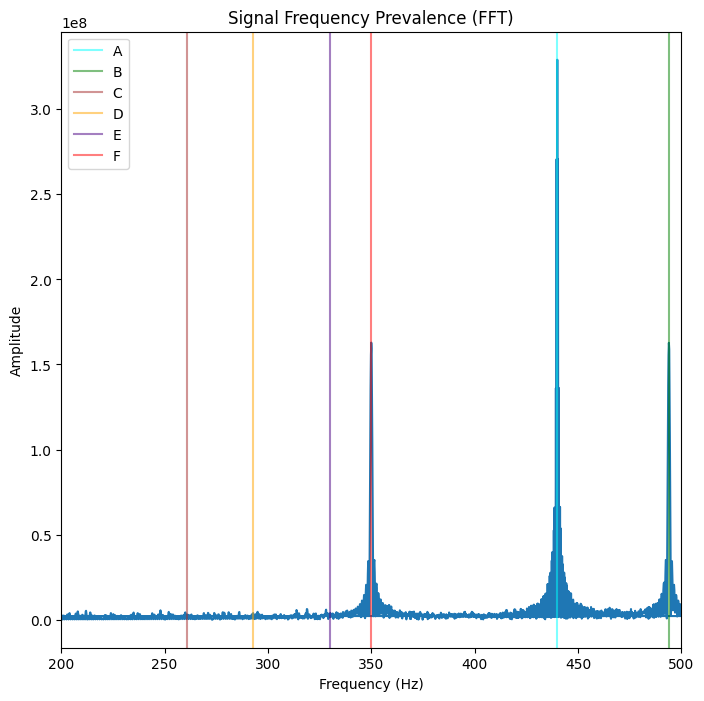

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.axvline(x=440, color="cyan", label="A",alpha=0.5) # A note: 440 hz
plt.axvline(x=494, color="green", label="B",alpha=0.5) # B Note: 494 hz
plt.axvline(x=261, color="brown", label="C",alpha=0.5) # C Note: 261 hz
plt.axvline(x=293, color="orange", label="D",alpha=0.5) # D Note: 293 hz
plt.axvline(x=330, color="indigo", label="E",alpha=0.5) # E Note: 330 hz
plt.axvline(x=350, color="red", label="F",alpha=0.5) # F Note: 350 hz
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Perfect, There are Three Notes!

Three notes stand out, and one note is used about twice as much as the other two: A, B, F

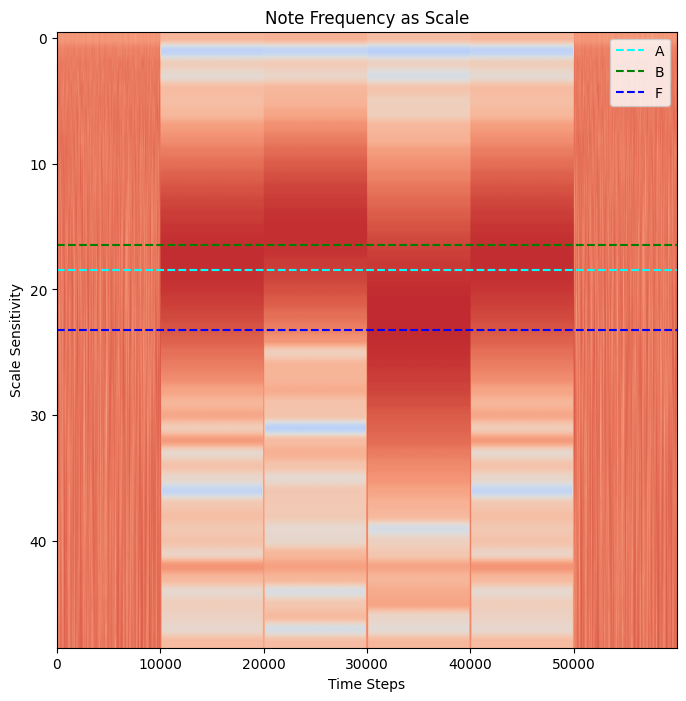

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay frequency of notes as dotted lines
sample_rate = 1/sampleRate
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
plt.axhline(y=a_freq, color='cyan', linestyle='--', label='A')
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
plt.axhline(y=b_freq, color="green", linestyle='--', label='B')
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
plt.axhline(y=f_freq, color='blue', linestyle='--', label='F')

# Plot Power scalogram
power = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.show()

## Three Notes Played Over Six Seconds

We have the keypad solution! The three notes are played (sometimes repeated) over the course of the six seconds

```
A, B, F, A
```

From our original problem, we know that the door code is set up as:
- A note: 0
- B note: 1
- C note: 2
- D note: 3
- E note: 4
- F note: 5

The solution to the door password is:
```
0, 1, 5, 0
```

## Choosing the Right Range of Scales

Note, move this to wavelet basics?

In [ ]:
# Useful to determine the right range of scales
plt.xlabel("Scale")
plt.ylabel("Frequency")
plt.plot(freqs)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[8125.         4062.5        2708.33333333 2031.25       1625.
 1354.16666667 1160.71428571 1015.625       902.77777778  812.5
  738.63636364  677.08333333  625.          580.35714286  541.66666667
  507.8125      477.94117647  451.38888889  427.63157895  406.25
  386.9047619   369.31818182  353.26086957  338.54166667  325.
  312.5         300.92592593  290.17857143  280.17241379  270.83333333
  262.09677419  253.90625     246.21212121  238.97058824  232.14285714
  225.69444444  219.59459459  213.81578947  208.33333333  203.125
  198.17073171  193.45238095  188.95348837  184.65909091  180.55555556
  176.63043478  172.87234043  169.27083333  165.81632653]


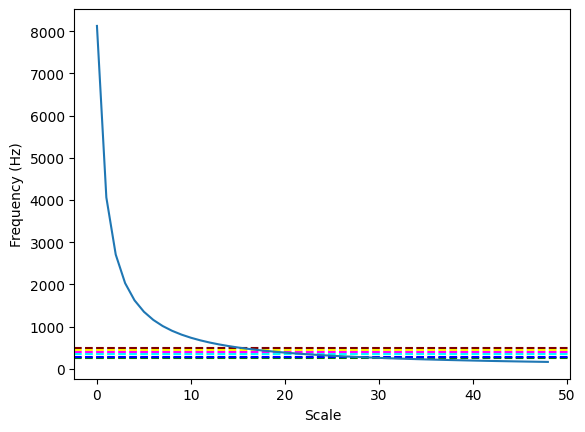

In [11]:
wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 50)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

# freq is the same as scale2freq of the wavlet scales
print(pywt.scale2frequency('morl', scales) == freqs)

# freqs is normalized frequencies, so needs to be multiplied by thes sampling frequency to turn back into frequencies
#which means that you need to multiply them by your sampling frequency (500Hz) to turn them into actual frequencies.
plt.axhline(y=440, color='yellow', linestyle='--', label='A')
plt.axhline(y=494, color="maroon", linestyle='--', label='B')
plt.axhline(y=261, color='green', linestyle='--', label='C')
plt.axhline(y=293, color='blue', linestyle='--', label='D')
plt.axhline(y=350, color='cyan', linestyle='--', label='E')
plt.axhline(y=391, color='fuchsia', linestyle='--', label='F')
plt.xlabel("Scale")
plt.ylabel("Frequency (Hz)")
print(freqs*sampleRate)
plt.plot(freqs*sampleRate)
#plt.plot(freqs*1/sampleRate)
# Usefulful to determine the right range of scales

---

## Summary
Now we've had a chance to work with unknown input values, but within an expected range. Different time-series data will have different ranges of expected frequencies, and with Fourier Transform and wavelet analysis it is possible to pull out such relevant data.

### What's next?

Up next: apply wavelets transform and work with weather data!